## Import Library


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('ggplot')
sns.set_palette("husl")


### Load Dataset
df = pd.read_csv(r"../data/zomato.csv")
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


### Data Quality info
- rows columns
- datatype
- missing values
- heatmap view for missing value


 DATASET OVERVIEW 
Total rows: 51717
Total columns: 17
Memory usage: 572.18 MB

 DATA TYPES 
url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

 MISSING VALUES ANALYSIS 
                             Missing_Count  Missing_Percentage
dish_liked                           28078           54.291626
rate                                  7775           15.033741
phone                          

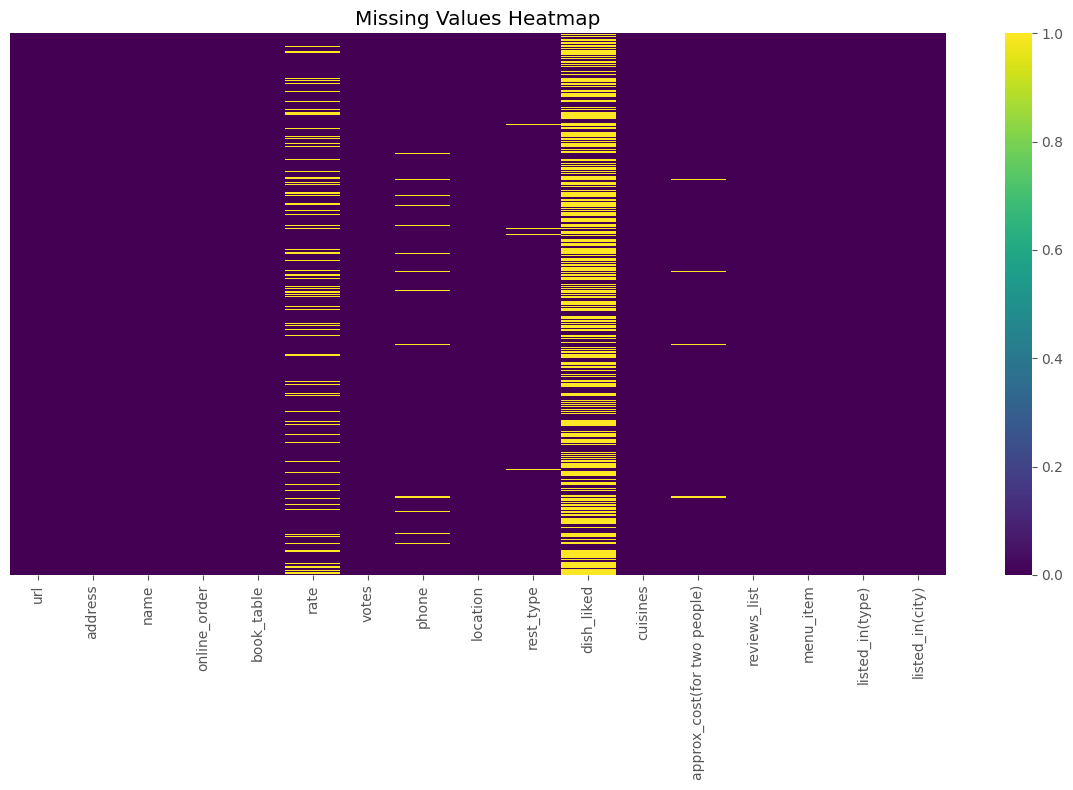

In [3]:
# Basic info about the dataset
print(" DATASET OVERVIEW ")
print(f"Total rows: {len(df)}")
print(f"Total columns: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Data types
print("\n DATA TYPES ")
print(df.dtypes)


# Missing values analysis
print("\n MISSING VALUES ANALYSIS ")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percentage
}).sort_values('Missing_Percentage', ascending=False)
print(missing_df)

# Create missing values heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.tight_layout()
plt.show()

### Univariate Analysis - analysis by single variable
- votes, rate and cost

In [10]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
url,51717,51717,https://www.zomato.com/bangalore/jalsa-banasha...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
address,51717,11495,Delivery Only,128,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,51717,8792,Cafe Coffee Day,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
online_order,51717,2,Yes,30444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
book_table,51717,2,No,45268,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rate,43942,64,NEW,2208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
votes,51717.0,NaN,NaN,NaN,283.697527,803.838853,0.0,7.0,41.0,198.0,16832.0
phone,50509,14926,080 43334321,216,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location,51696,93,BTM,5124,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rest_type,51490,93,Quick Bites,19132,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.rate.value_counts()

rate
NEW       2208
3.9/5     2098
3.8/5     2022
3.7/5     2011
3.9 /5    1874
          ... 
2.2 /5       7
2.0 /5       7
2.0/5        4
1.8 /5       3
1.8/5        2
Name: count, Length: 64, dtype: int64

In [12]:
df.votes.value_counts()

votes
0       10027
4        1140
6         992
7         872
9         738
        ...  
3673        1
1862        1
3909        1
2155        1
843         1
Name: count, Length: 2328, dtype: int64

In [13]:
df['approx_cost(for two people)'].value_counts()[:50]

approx_cost(for two people)
300      7576
400      6562
500      4980
200      4857
600      3714
250      2959
800      2285
150      2066
700      1948
350      1763
1,000    1637
450      1417
1,200     993
100       993
1,500     971
650       776
550       761
750       758
900       700
1,300     516
1,100     512
1,400     473
2,000     363
1,600     266
1,700     247
1,800     203
850       166
3,000     162
2,500     146
2,200      78
1,900      70
2,100      67
950        62
2,800      45
4,000      29
3,500      25
120        24
2,400      23
180        20
1,350      18
3,400      13
2,300      11
2,600      10
80         10
230        10
1,250       9
40          8
50          8
130         8
1,650       6
Name: count, dtype: int64

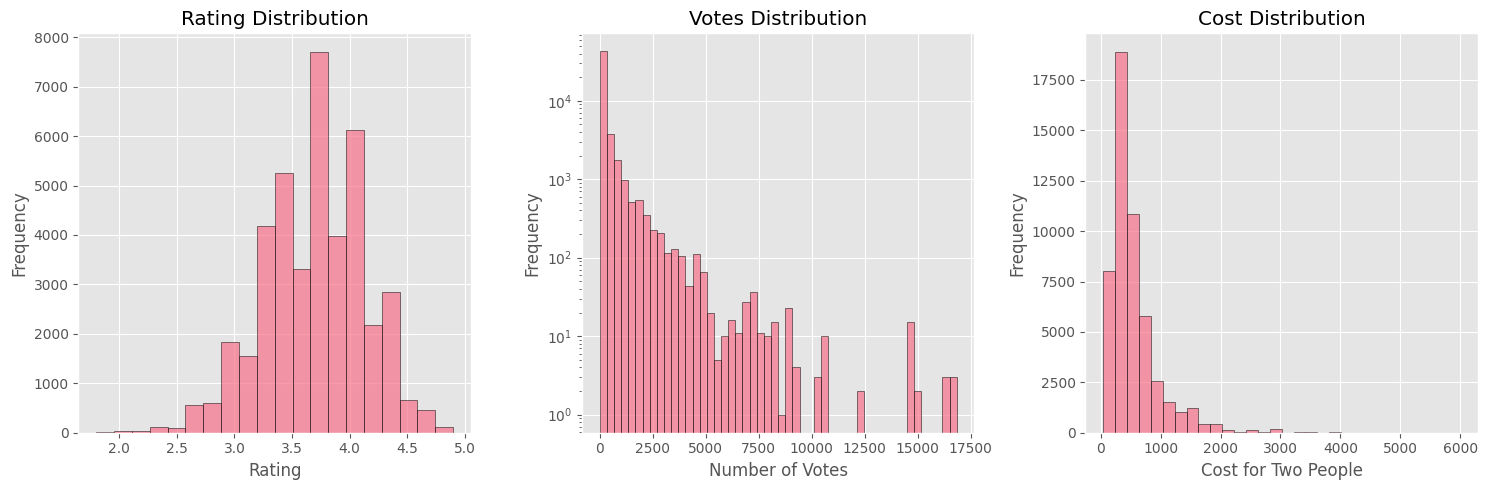

=== STATISTICAL SUMMARY ===
         rate_clean         votes    cost_clean
count  41665.000000  51717.000000  51371.000000
mean       3.700449    283.697527    555.431566
std        0.440513    803.838853    438.850728
min        1.800000      0.000000     40.000000
25%        3.400000      7.000000    300.000000
50%        3.700000     41.000000    400.000000
75%        4.000000    198.000000    650.000000
max        4.900000  16832.000000   6000.000000


In [14]:
# 1. Rating Distribution
plt.figure(figsize=(15, 5))

# Clean rate column for analysis
df['rate_clean'] = df['rate'].apply(lambda x: float(x.split('/')[0]) if pd.notna(x) and x not in ['NEW', '-'] else np.nan)

plt.subplot(1, 3, 1)
df['rate_clean'].hist(bins=20, alpha=0.7, edgecolor='black')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# 2. Votes Distribution
plt.subplot(1, 3, 2)
df['votes'].hist(bins=50, alpha=0.7, edgecolor='black')
plt.title('Votes Distribution')
plt.xlabel('Number of Votes')
plt.ylabel('Frequency')
plt.yscale('log')  # Log scale due to high variance

# 3. Cost Distribution
df['cost_clean'] = df['approx_cost(for two people)'].str.replace(',', '').str.replace('₹', '').astype(float, errors='ignore')

plt.subplot(1, 3, 3)
df['cost_clean'].dropna().hist(bins=30, alpha=0.7, edgecolor='black')
plt.title('Cost Distribution')
plt.xlabel('Cost for Two People')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
# Statistical summary
print("=== STATISTICAL SUMMARY ===")
print(df[['rate_clean', 'votes', 'cost_clean']].describe())

### Categorical Variables Analysis
- locations, resturant types, and order type analysis

TOP 15 LOCATIONS: 
location
BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
Indiranagar              2083
Jayanagar                1926
Marathahalli             1846
Bannerghatta Road        1630
Bellandur                1286
Electronic City          1258
Koramangala 1st Block    1238
Brigade Road             1218
Koramangala 7th Block    1181
Koramangala 6th Block    1156
Name: count, dtype: int64


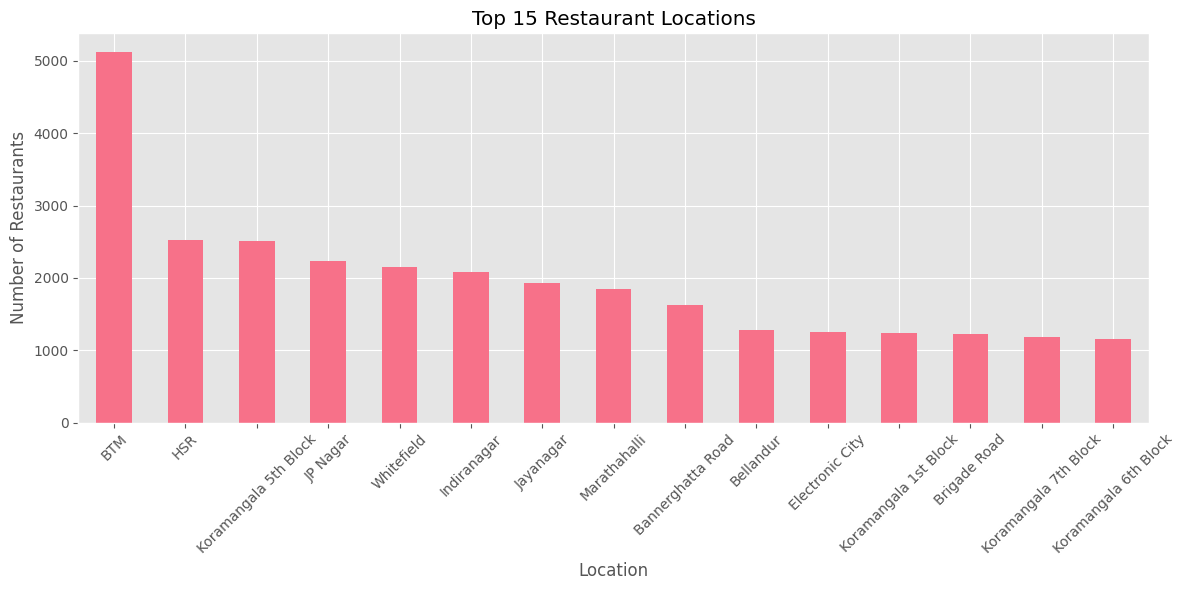


RESTAURANT TYPES: 
rest_type
Quick Bites           19132
Casual Dining         10330
Cafe                   3732
Delivery               2604
Dessert Parlor         2263
Takeaway, Delivery     2037
Casual Dining, Bar     1154
Bakery                 1141
Beverage Shop           867
Bar                     697
Name: count, dtype: int64


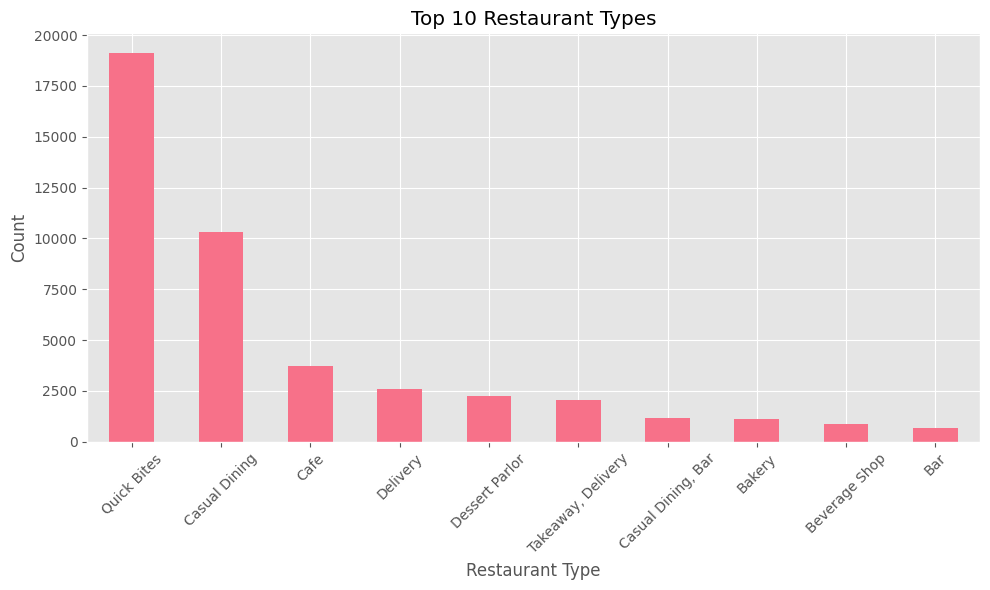


SERVICE AVAILABILITY: 
Online Order:
online_order
Yes    30444
No     21273
Name: count, dtype: int64

Book Table:
book_table
No     45268
Yes     6449
Name: count, dtype: int64

Cross-tabulation: Online Order vs Book Table
book_table       No   Yes
online_order             
No            18629  2644
Yes           26639  3805


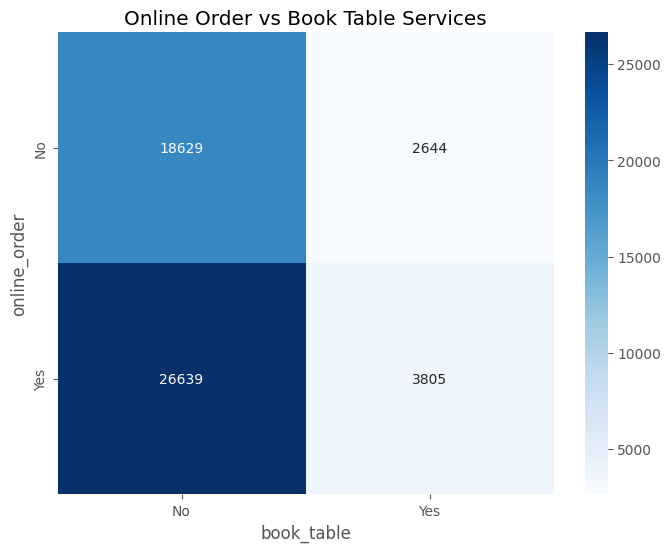

In [15]:
# Top locations
print("TOP 15 LOCATIONS: ")
location_counts = df['location'].value_counts().head(15)
print(location_counts)

plt.figure(figsize=(12, 6))
location_counts.plot(kind='bar')
plt.title('Top 15 Restaurant Locations')
plt.xlabel('Location')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Restaurant types
print("\nRESTAURANT TYPES: ")
rest_type_counts = df['rest_type'].value_counts().head(10)
print(rest_type_counts)

plt.figure(figsize=(10, 6))
rest_type_counts.plot(kind='bar')
plt.title('Top 10 Restaurant Types')
plt.xlabel('Restaurant Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Online order and book table analysis
print("\nSERVICE AVAILABILITY: ")
print("Online Order:")
print(df['online_order'].value_counts())
print("\nBook Table:")
print(df['book_table'].value_counts())

# Create a cross-tabulation
service_crosstab = pd.crosstab(df['online_order'], df['book_table'])
print("\nCross-tabulation: Online Order vs Book Table")
print(service_crosstab)

plt.figure(figsize=(8, 6))
sns.heatmap(service_crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Online Order vs Book Table Services')
plt.show()

### Cuisine Analysis

 CUISINE ANALYSIS 
Top 20 Cuisines:
cuisine
North Indian    21085
Chinese         15547
South Indian     8644
Fast Food        8096
Biryani          6492
Continental      5765
Desserts         5633
Cafe             5303
Beverages        4747
Italian          3389
Bakery           2840
Street Food      2595
Pizza            2073
Burger           2009
Seafood          1810
Ice Cream        1774
Andhra           1760
Mughlai          1570
Rolls            1470
American         1461
Name: count, dtype: int64


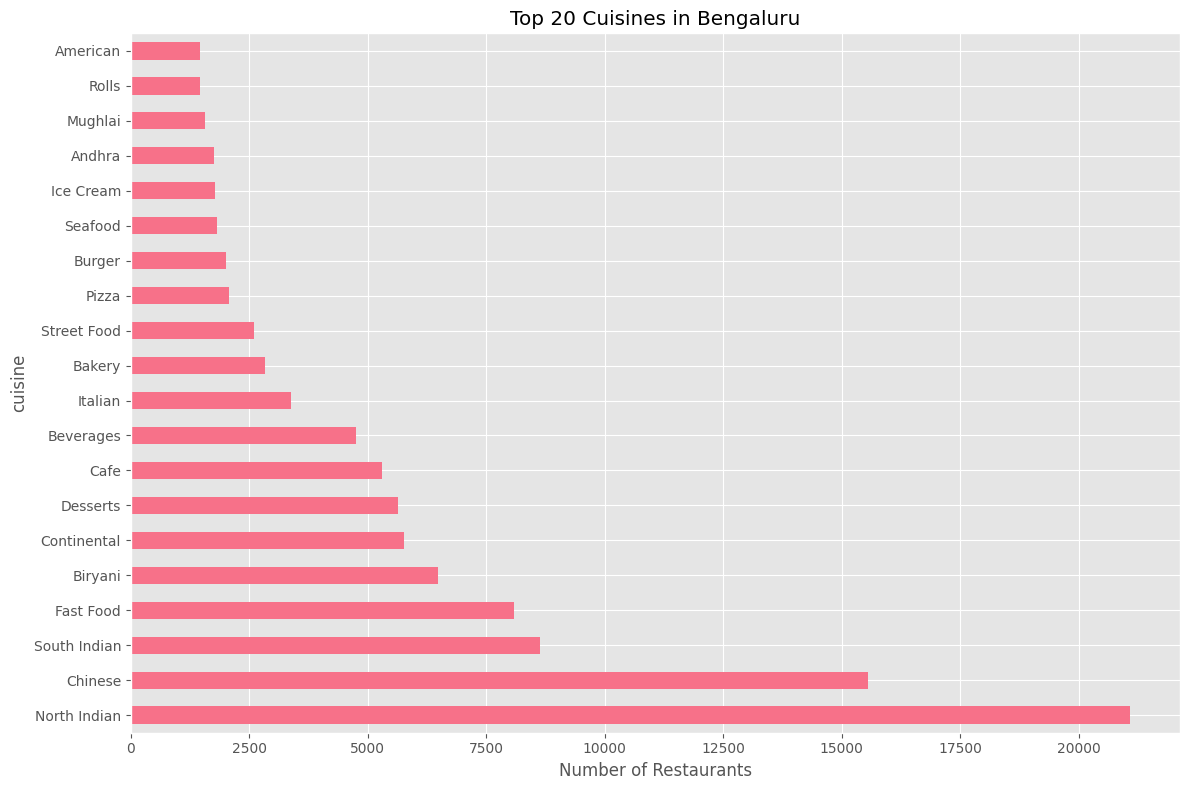

In [16]:
# Extract and analyze cuisines
print(" CUISINE ANALYSIS ")

# Split cuisines (many restaurants have multiple cuisines)
all_cuisines = []
for cuisines in df['cuisines'].dropna():
    cuisine_list = [cuisine.strip() for cuisine in cuisines.split(',')]
    all_cuisines.extend(cuisine_list)

cuisine_df = pd.DataFrame({'cuisine': all_cuisines})
top_cuisines = cuisine_df['cuisine'].value_counts().head(20)

print("Top 20 Cuisines:")
print(top_cuisines)

plt.figure(figsize=(12, 8))
top_cuisines.plot(kind='barh')
plt.title('Top 20 Cuisines in Bengaluru')
plt.xlabel('Number of Restaurants')
plt.tight_layout()
plt.show()

### Bivariate Analysis
- analysis relation with multiple features

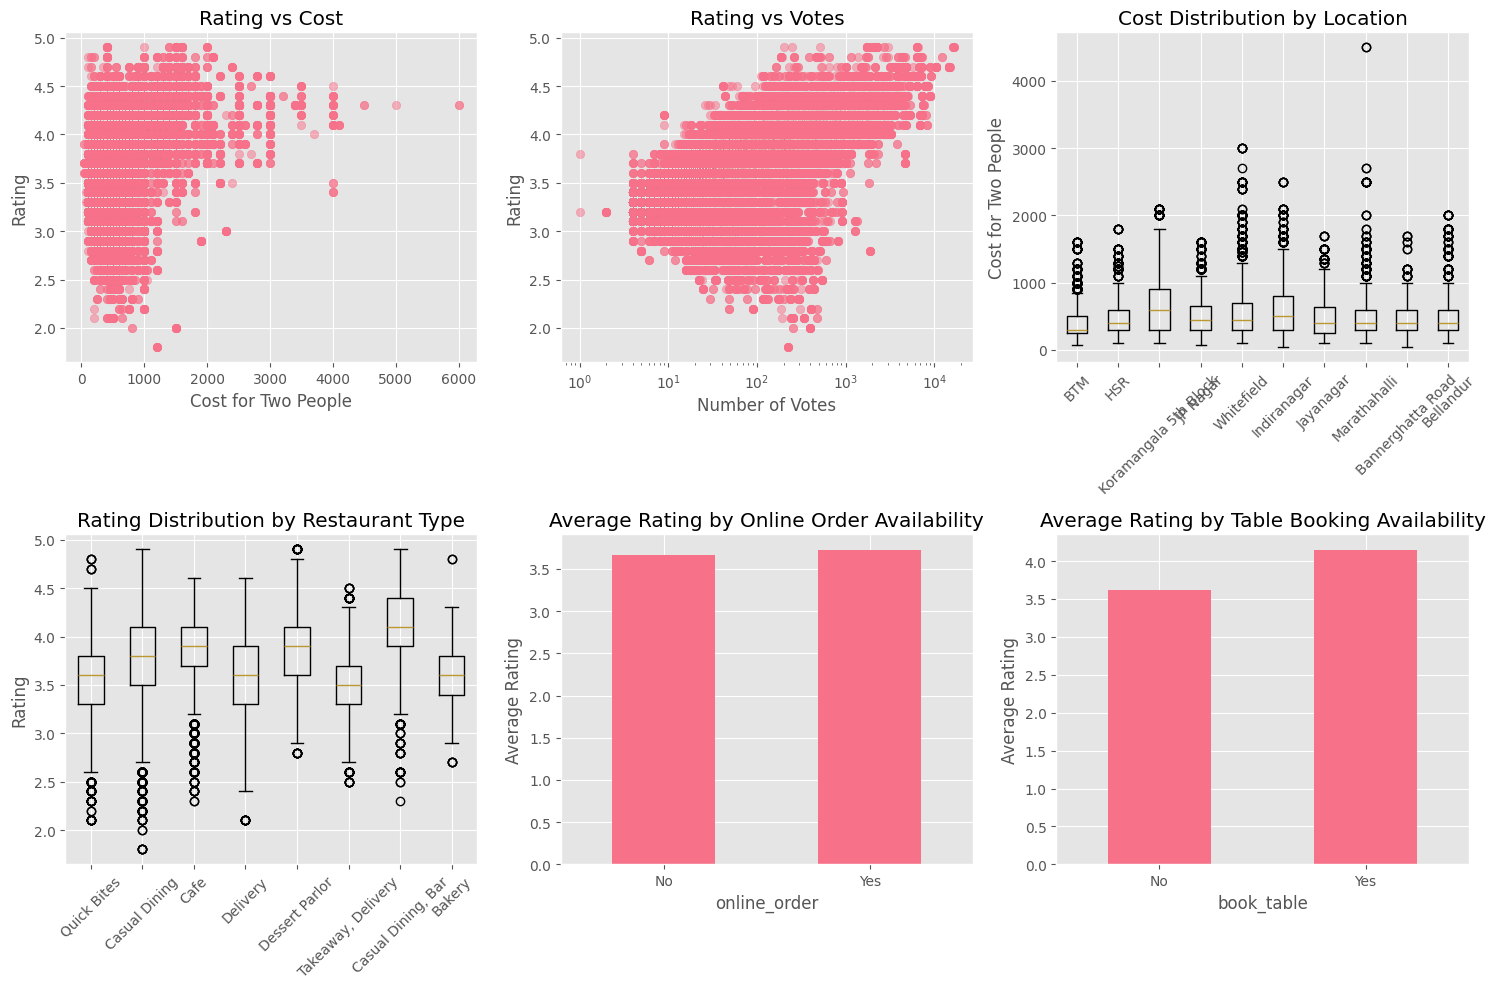

In [17]:
# Rating vs Cost relationship
plt.figure(figsize=(15, 10))

# 1. Rating vs Cost scatter plot
plt.subplot(2, 3, 1)
plt.scatter(df['cost_clean'], df['rate_clean'], alpha=0.5)
plt.xlabel('Cost for Two People')
plt.ylabel('Rating')
plt.title('Rating vs Cost')

# 2. Rating vs Votes
plt.subplot(2, 3, 2)
plt.scatter(df['votes'], df['rate_clean'], alpha=0.5)
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.title('Rating vs Votes')
plt.xscale('log')

# 3. Cost by location (top 10 locations)
plt.subplot(2, 3, 3)
top_locations = df['location'].value_counts().head(10).index
location_cost_data = []
for loc in top_locations:
    location_cost_data.append(df[df['location'] == loc]['cost_clean'].dropna())

plt.boxplot(location_cost_data, labels=top_locations)
plt.xticks(rotation=45)
plt.ylabel('Cost for Two People')
plt.title('Cost Distribution by Location')

# 4. Rating by restaurant type
plt.subplot(2, 3, 4)
top_rest_types = df['rest_type'].value_counts().head(8).index
rating_by_type_data = []
for rest_type in top_rest_types:
    rating_by_type_data.append(df[df['rest_type'] == rest_type]['rate_clean'].dropna())

plt.boxplot(rating_by_type_data, labels=top_rest_types)
plt.xticks(rotation=45)
plt.ylabel('Rating')
plt.title('Rating Distribution by Restaurant Type')

# 5. Online order vs average rating
plt.subplot(2, 3, 5)
online_rating = df.groupby('online_order')['rate_clean'].mean()
online_rating.plot(kind='bar')
plt.title('Average Rating by Online Order Availability')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)

# 6. Book table vs average rating
plt.subplot(2, 3, 6)
table_rating = df.groupby('book_table')['rate_clean'].mean()
table_rating.plot(kind='bar')
plt.title('Average Rating by Table Booking Availability')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

### Correlation Analysis and Insights

 CORRELATION ANALYSIS 


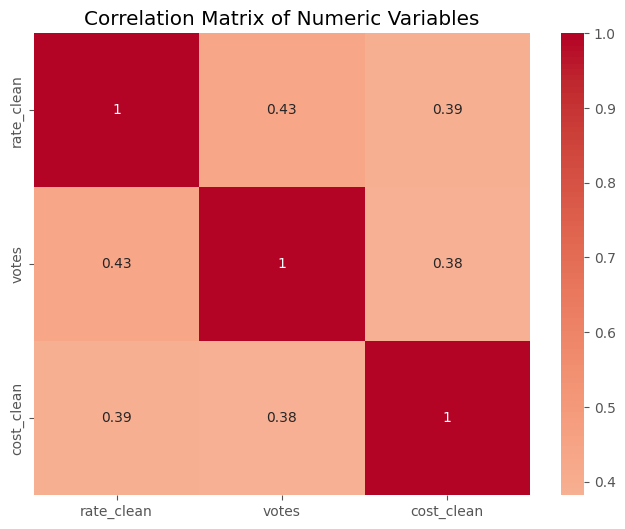


 PRICE RANGE ANALYSIS 
                 mean  count
price_range                 
Budget       3.567165  12587
Mid-range    3.616283  15906
Expensive    3.842831   9255
Premium      4.162207   3670


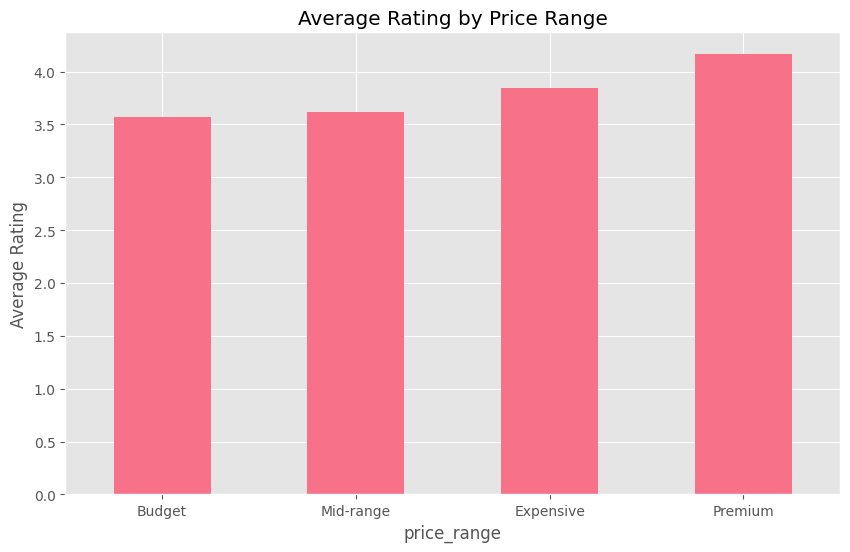

In [18]:
# Correlation analysis
print(" CORRELATION ANALYSIS ")
numeric_columns = ['rate_clean', 'votes', 'cost_clean']
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

# Price range analysis
print("\n PRICE RANGE ANALYSIS ")
df['price_range'] = pd.cut(df['cost_clean'], 
                          bins=[0, 300, 600, 1200, float('inf')], 
                          labels=['Budget', 'Mid-range', 'Expensive', 'Premium'])

price_range_stats = df.groupby('price_range')['rate_clean'].agg(['mean', 'count'])
print(price_range_stats)

plt.figure(figsize=(10, 6))
df.groupby('price_range')['rate_clean'].mean().plot(kind='bar')
plt.title('Average Rating by Price Range')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

### Key Insight from the dataset

In [20]:
print("=== KEY INSIGHTS SUMMARY ===")
print("1. Data Quality:")
print(f"   - Dataset contains {len(df)} restaurants")
print(f"   - Missing values: rate ({missing_df.loc['rate', 'Missing_Percentage']:.1f}%), dish_liked ({missing_df.loc['dish_liked', 'Missing_Percentage']:.1f}%)")

print("\n2. Restaurant Distribution:")
print(f"   - Most restaurants in: {df['location'].mode()[0]}")
print(f"   - Most common type: {df['rest_type'].mode()[0]}")

print("\n3. Pricing and Ratings:")
print(f"   - Average rating: {df['rate_clean'].mean():.2f}")
print(f"   - Average cost for two: {df['cost_clean'].mean():.0f} Rs")
print(f"   - Correlation between cost and rating: {correlation_matrix.loc['cost_clean', 'rate_clean']:.3f}")

print("\n4. Services:")
print(f"   - {(df['online_order'] == 'Yes').sum()/len(df)*100:.1f}% offer online ordering")
print(f"   - {(df['book_table'] == 'Yes').sum()/len(df)*100:.1f}% offer table booking")

print("\n5. Popular Cuisines:")
print(f"   - Top 5 cuisines: {', '.join(top_cuisines.head(5).index)}")

=== KEY INSIGHTS SUMMARY ===
1. Data Quality:
   - Dataset contains 51717 restaurants
   - Missing values: rate (15.0%), dish_liked (54.3%)

2. Restaurant Distribution:
   - Most restaurants in: BTM
   - Most common type: Quick Bites

3. Pricing and Ratings:
   - Average rating: 3.70
   - Average cost for two: 555 Rs
   - Correlation between cost and rating: 0.385

4. Services:
   - 58.9% offer online ordering
   - 12.5% offer table booking

5. Popular Cuisines:
   - Top 5 cuisines: North Indian, Chinese, South Indian, Fast Food, Biryani
